In [10]:
# Import python notations
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
import pandas as pd
import io
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)

# Load the saved model instances from the full beiRNNModel run
with open('kfolds_workspace.pkl', 'rb') as file:
    loaded_workspace = pickle.load(file)
    
kfoldsruns = loaded_workspace['kfoldsruns']
top_10_models_data_node_20 = loaded_workspace['best20nodemodels']



2.15.0



In [11]:
#get intakes for ensure +etoh and ensure only
inpEtOH = pd.read_csv(('ephysitpncintake.csv'), header=None) #intakes for ensure + etoh
inpEnsure = pd.read_csv(('enIntakeForRNN.csv'), header=None) #intakes for ensure only
#reshape into the size that the model likes to read in
re_inpEtOH = np.expand_dims(np.transpose(inpEphys.copy()), axis=-1)
re_inpEnsure = np.expand_dims(np.transpose(inpEnsure.copy()), axis=-1)

1/1 [==============================] - 0s 27ms/step


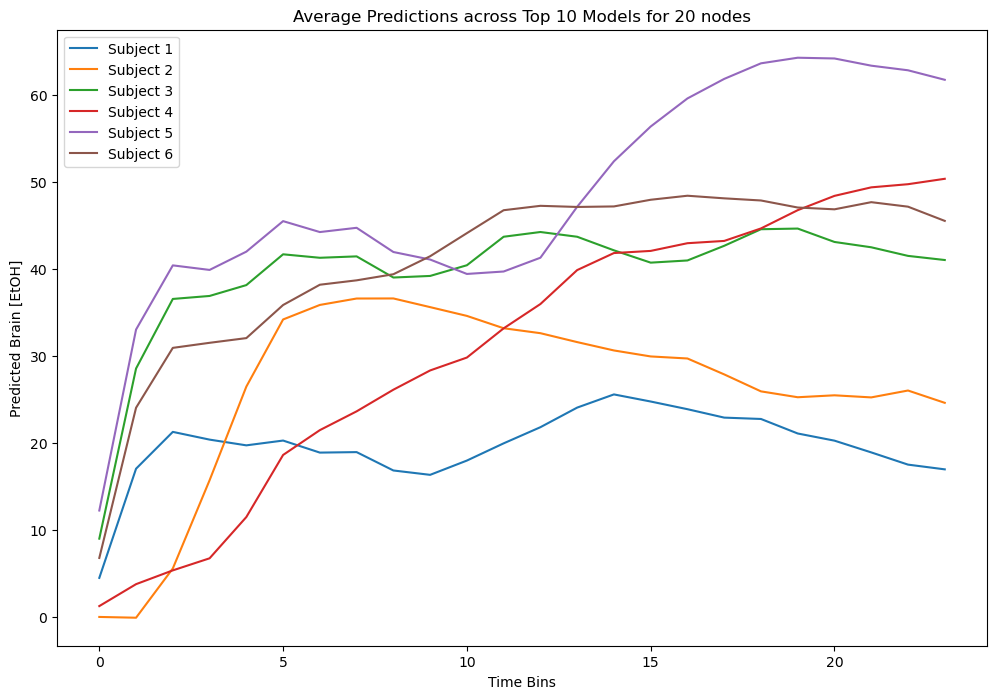

In [26]:
# Currently edited to run for the ensure data to do etoh data, 
# change re_inpEnsure to re_inpEtOH
# Initialize an array to store predictions for each model
all_predictions = []

# Initialize an array to store the average predictions across models
avg_predictions_across_models = np.zeros((6, 24)) 

# Iterate over the top 10 models for nodenum = 20 across each intake/animal
for i, (avg_explained_var, model_instance) in enumerate(top_10_models_data_node_20):
    predictions = model_instance.predict(re_inpEnsure) #this is the model run, change to EtOH if want to run on that data 

    # Store predictions for each model
    all_predictions.append(predictions)

    # Accumulate predictions for calculating the average later
    avg_predictions_across_models += predictions[:, :, 0]  # Remove the extra dimension/flatten it

    # Save individual model predictions to CSV
    #commented this out, but can un-comment if you want that individual run data for each of the runs for each animal
    #np.savetxt(f'model_{i + 1}_Enpredictions.csv', predictions[:, :, 0], delimiter=',')

# Calculate the average predictions across all models for each subject
avg_predictions_across_models /= len(top_10_models_data_node_20)

# Save average predictions to CSV
np.savetxt('averagePredEnsure.csv', avg_predictions_across_models, delimiter=',')

# Plot the average predictions for each subject
plt.figure(figsize=(12, 8))
for i in range(avg_predictions_across_models.shape[0]):
    plt.plot(avg_predictions_across_models[i, :], label=f'Subject {i + 1}')

plt.title('Average Predictions across Top 10 Models for 20 nodes')
plt.xlabel('Time Bins')
plt.ylabel('Predicted Brain [EtOH]')
plt.legend()
plt.show()